In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import itertools
import yfinance as yf

warnings.filterwarnings('ignore')

In [2]:
tickers = ['AAPL', 'MSFT', 'GOOGL']  # Add your tickers here
data = yf.download(tickers, start='2010-01-01', end='2023-01-01', interval='1d')

[*********************100%***********************]  3 of 3 completed


In [3]:
all_ts = data['Close']


--- Analyzing Ticker: AAPL ---


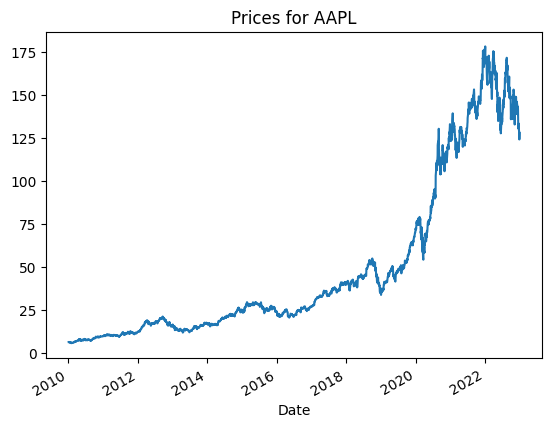


--- Analyzing Ticker: MSFT ---


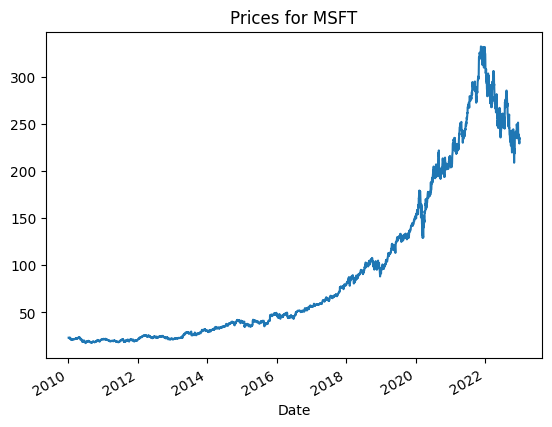


--- Analyzing Ticker: GOOGL ---


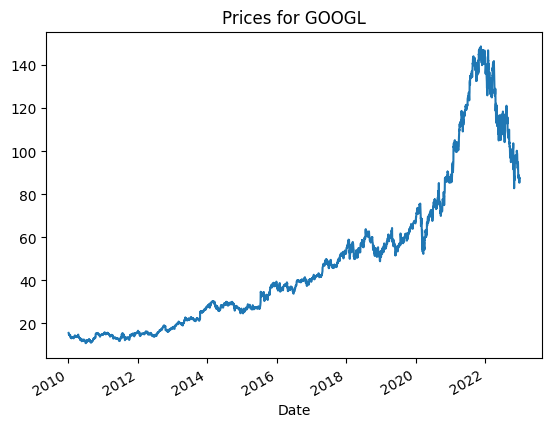

In [4]:
for ticker in tickers:
    print(f"\n--- Analyzing Ticker: {ticker} ---")

    # 1. Prepare the time series for this specific ticker
    ts = all_ts[ticker].dropna()

    # 2. Plot Original Series
    ts.plot(title=f"Prices for {ticker}")
    plt.show()

In [5]:
for ticker in tickers:
    print(f"\n--- Analyzing Ticker: {ticker} ---")

    # 1. Prepare the time series for this specific ticker
    ts = all_ts[ticker].dropna()

    # 3. Stationarity Test (ADF)
    result = adfuller(ts)
    print(f'ADF Statistic: {result[0]:f}')
    print(f'p-value: {result[1]:f}')

    if result[1] > 0.05:
        print("Series is non-stationary; differencing is needed.")
    else:
        print("Series is stationary; no differencing needed.")


--- Analyzing Ticker: AAPL ---
ADF Statistic: -0.217797
p-value: 0.936367
Series is non-stationary; differencing is needed.

--- Analyzing Ticker: MSFT ---
ADF Statistic: 0.256343
p-value: 0.975250
Series is non-stationary; differencing is needed.

--- Analyzing Ticker: GOOGL ---
ADF Statistic: -0.630788
p-value: 0.863872
Series is non-stationary; differencing is needed.



--- Processing Ticker: AAPL ---


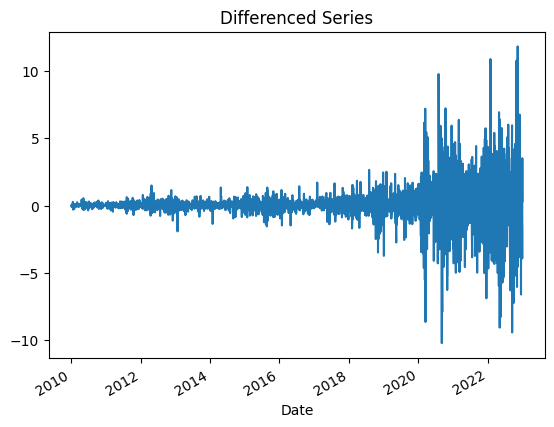

ADF Statistic (differenced): -11.591567
p-value (differenced): 0.000000

--- Processing Ticker: GOOGL ---


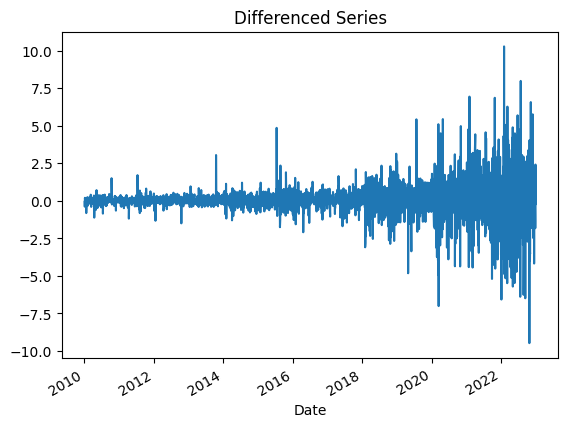

ADF Statistic (differenced): -13.143875
p-value (differenced): 0.000000

--- Processing Ticker: MSFT ---


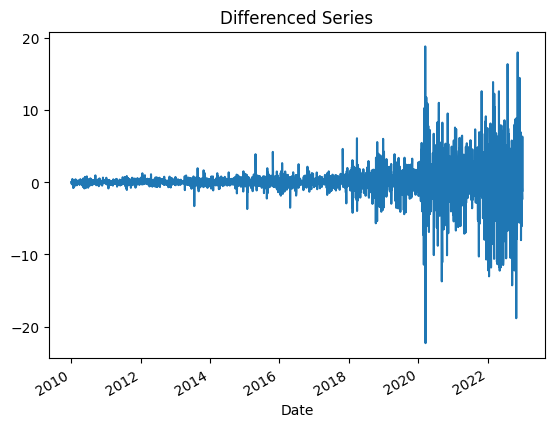

ADF Statistic (differenced): -16.034372
p-value (differenced): 0.000000


In [6]:
for ticker in all_ts.columns:
    print(f"\n--- Processing Ticker: {ticker} ---")

    # Select the specific ticker and drop missing values
    ts = all_ts[ticker].dropna()

    # Perform differencing
    ts_diff = ts.diff().dropna()
    ts_diff.plot(title='Differenced Series')
    plt.show()
    result_diff = adfuller(ts_diff)
    print('ADF Statistic (differenced): %f' % result_diff[0])
    print('p-value (differenced): %f' % result_diff[1])


--- Processing Ticker: AAPL ---


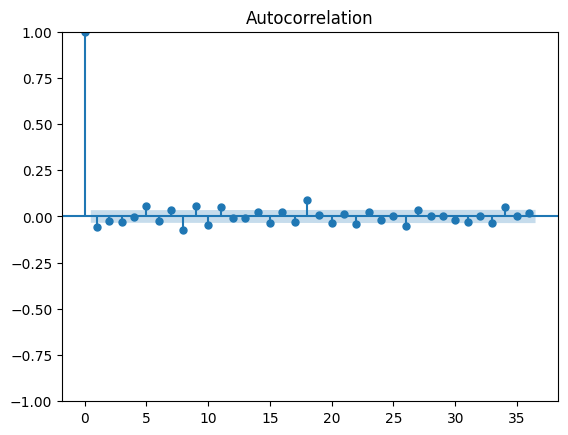

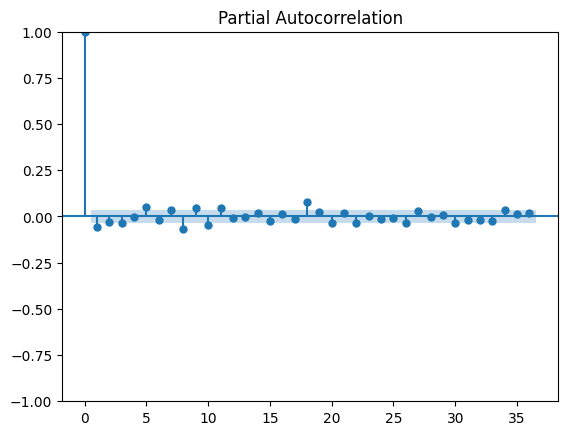


--- Processing Ticker: GOOGL ---


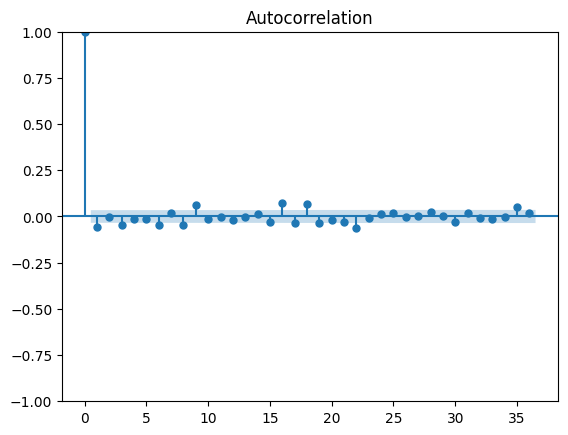

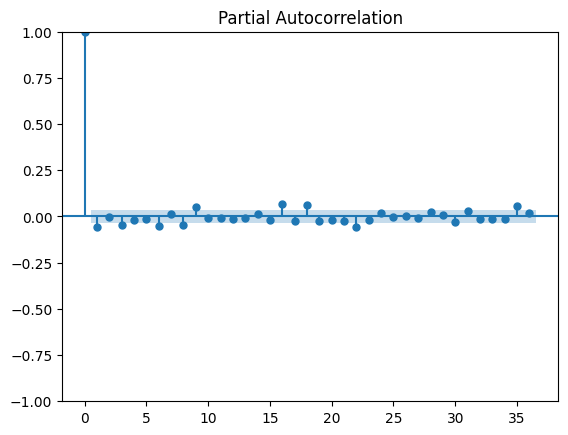


--- Processing Ticker: MSFT ---


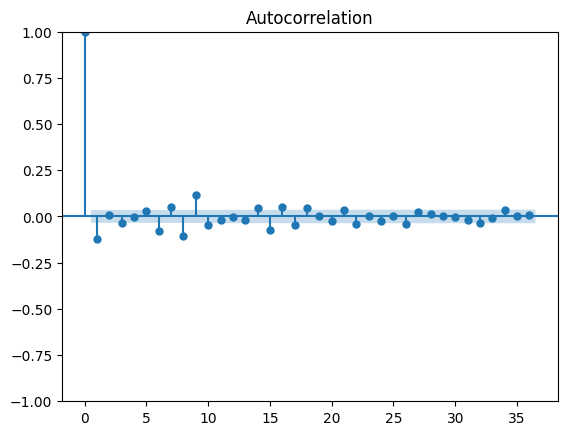

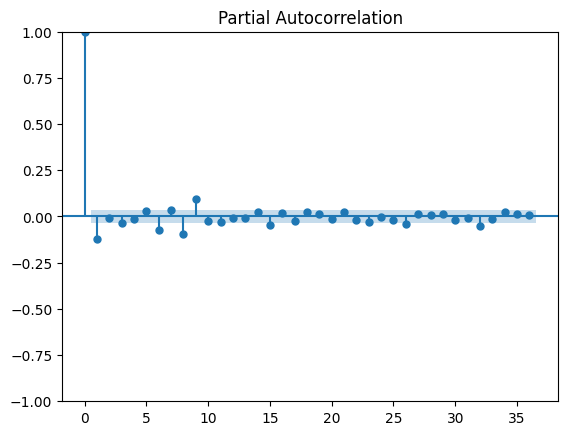

In [7]:
for ticker in all_ts.columns:
    print(f"\n--- Processing Ticker: {ticker} ---")

    # Select the specific ticker and drop missing values
    ts = all_ts[ticker].dropna()

    # Perform differencing
    ts_diff = ts.diff().dropna()
    plot_acf(ts_diff)
    plt.show()

    plot_pacf(ts_diff)
    plt.show()

In [8]:
for ticker in all_ts.columns:
    print(f"\n--- Processing Ticker: {ticker} ---")

    # Select the specific ticker and drop missing values
    ts = all_ts[ticker].dropna()
    p = range(0, 4)
    d = range(0, 3)
    q = range(0, 4)
    pdq = list(itertools.product(p, d, q))

    best_aic = np.inf
    best_order = None
    best_model = None

    for order in pdq:
      try:
        model = ARIMA(ts, order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
      except:
        continue
    print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')


--- Processing Ticker: AAPL ---
Best ARIMA order: (2, 2, 3) with AIC: 11291.66164363111

--- Processing Ticker: GOOGL ---
Best ARIMA order: (3, 2, 3) with AIC: 9985.57433913098

--- Processing Ticker: MSFT ---
Best ARIMA order: (3, 1, 3) with AIC: 14821.196868164552


Day 1: predicted=44.971027, expected=47.564754
Day 2: predicted=44.521518, expected=48.955124
Day 3: predicted=44.099281, expected=49.096760
Day 4: predicted=44.153625, expected=49.351685
Day 5: predicted=44.345581, expected=48.889023
Day 6: predicted=44.140947, expected=48.922077
Day 7: predicted=43.672572, expected=49.306843
Day 8: predicted=49.920227, expected=49.159981
Day 9: predicted=50.749605, expected=49.477406
Day 10: predicted=51.452126, expected=49.685848
Day 11: predicted=52.184327, expected=49.801918
Day 12: predicted=52.887317, expected=50.531525
Day 13: predicted=53.591290, expected=51.540634
Day 14: predicted=54.286998, expected=51.038452
Day 15: predicted=51.083384, expected=50.938953
Day 16: predicted=52.297202, expected=50.941334
Day 17: predicted=52.545109, expected=51.045559
Day 18: predicted=52.506862, expected=51.204266
Day 19: predicted=53.065947, expected=51.625919
Day 20: predicted=53.574987, expected=52.042816
Day 21: predicted=53.790178, expected=52.819790
D

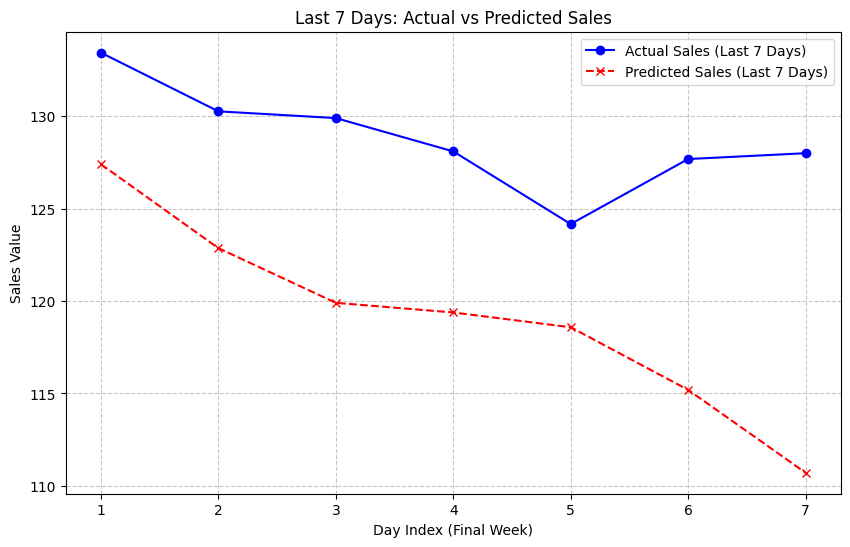

In [9]:
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# # 1. Clean data preparation
# ts1 = all_ts['AAPL'].dropna()
# X1 = ts1.values.flatten()
# size1 = int(len(X1) * 0.66)
# train1, test1 = X1[0:size1], X1[size1:len(X1)]

# window_size1 = 7
# forecast_horizon1 = 7
# history1 = [float(x) for x in train1[-window_size1:]]
# predictions1 = []

# # 2. Multi-step Rolling Forecast Loop
# # We jump by 7 (forecast_horizon) each time
# for t in range(0, len(test1), forecast_horizon1):
#     # Train the model once for this 7-day block
#     model = ARIMA(history1, order=(2,2,3))
#     model_fit = model.fit()

#     # Predict the next 7 terms at once
#     # This uses the model's own predictions for terms 2-7
#     yhat_block = model_fit.forecast(steps=forecast_horizon1)

#     # Store predictions (making sure we don't exceed the test set length)
#     for i in range(len(yhat_block)):
#         if (t + i) < len(test1):
#             predictions1.append(yhat_block[i])

#     # 3. Update history with the ACTUAL observed values for those 7 days
#     # This prepares the model to "re-train" for the next 7-day jump
#     for i in range(forecast_horizon1):
#         if (t + i) < len(test1):
#             obs = float(test1[t + i])
#             history1.append(obs)
#             history1.pop(0) # Maintain the 7-day window size
#             print(f'Day {t+i+1}: predicted={yhat_block[i]:f}, expected={obs:f}')

#   # 1. Slice the data to get only the last 7 days
# last_7_actual1 = test1[-7:]
# last_7_predicted1 = predictions1[-7:]

# # 2. Create the plot
# plt.figure(figsize=(10, 6))

# # Use range(1, 8) or a list of dates for the x-axis labels
# days1 = range(1, 8)

# plt.plot(days1, last_7_actual1, marker='o', linestyle='-', color='blue', label='Actual Sales (Last 7 Days)')
# plt.plot(days1, last_7_predicted1, marker='x', linestyle='--', color='red', label='Predicted Sales (Last 7 Days)')

# # Adding details
# plt.title('Last 7 Days: Actual vs Predicted Sales')
# plt.xlabel('Day Index (Final Week)')
# plt.ylabel('Sales Value')
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.7)

# # Ensure the plot is displayed
# plt.show()

Day 1: predicted=62.387237, expected=61.187191
Day 2: predicted=64.121965, expected=61.591137
Day 3: predicted=64.981194, expected=61.443752
Day 4: predicted=64.179125, expected=61.419430
Day 5: predicted=62.747483, expected=62.321117
Day 6: predicted=61.917624, expected=62.593567
Day 7: predicted=62.707781, expected=62.748890
Day 8: predicted=63.761857, expected=62.155869
Day 9: predicted=64.155170, expected=61.963821
Day 10: predicted=64.315717, expected=62.435257
Day 11: predicted=65.353932, expected=61.148972
Day 12: predicted=65.843787, expected=60.744034
Day 13: predicted=66.000972, expected=60.336613
Day 14: predicted=67.045709, expected=60.639324
Day 15: predicted=59.419442, expected=60.414021
Day 16: predicted=59.134917, expected=60.629398
Day 17: predicted=58.739031, expected=60.600117
Day 18: predicted=59.030967, expected=61.373775
Day 19: predicted=57.849211, expected=62.342457
Day 20: predicted=57.572794, expected=61.825863
Day 21: predicted=57.143034, expected=62.758312
D

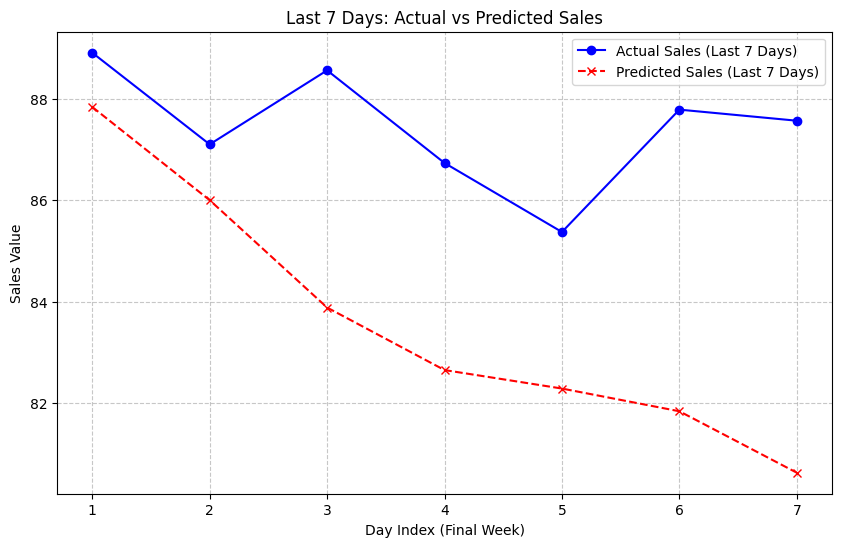

In [10]:
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# # 1. Clean data preparation
# ts2 = all_ts['GOOGL'].dropna()
# X2 = ts2.values.flatten()
# size2 = int(len(X2) * 0.66)
# train2, test2 = X2[0:size2], X2[size2:len(X2)]

# window_size2 = 7
# forecast_horizon2 = 7
# history2 = [float(x) for x in train2[-window_size2:]]
# predictions2 = []

# # 2. Multi-step Rolling Forecast Loop
# # We jump by 7 (forecast_horizon) each time
# for t in range(0, len(test2), forecast_horizon2):
#     # Train the model once for this 7-day block
#     model = ARIMA(history2, order=(3,2,3))
#     model_fit = model.fit()



#     # Predict the next 7 terms at once
#     # This uses the model's own predictions for terms 2-7
#     yhat_block = model_fit.forecast(steps=forecast_horizon2)

#     # Store predictions (making sure we don't exceed the test set length)
#     for i in range(len(yhat_block)):
#         if (t + i) < len(test2):
#             predictions2.append(yhat_block[i])

#     # 3. Update history with the ACTUAL observed values for those 7 days
#     # This prepares the model to "re-train" for the next 7-day jump
#     for i in range(forecast_horizon2):
#         if (t + i) < len(test2):
#             obs = float(test2[t + i])
#             history2.append(obs)
#             history2.pop(0) # Maintain the 7-day window size
#             print(f'Day {t+i+1}: predicted={yhat_block[i]:f}, expected={obs:f}')

#   # 1. Slice the data to get only the last 7 days
# last_7_actual2 = test2[-7:]
# last_7_predicted2 = predictions2[-7:]

# # 2. Create the plot
# plt.figure(figsize=(10, 6))

# # Use range(1, 8) or a list of dates for the x-axis labels
# days2 = range(1, 8)

# plt.plot(days2, last_7_actual2, marker='o', linestyle='-', color='blue', label='Actual Sales (Last 7 Days)')
# plt.plot(days2, last_7_predicted2, marker='x', linestyle='--', color='red', label='Predicted Sales (Last 7 Days)')

# # Adding details
# plt.title('Last 7 Days: Actual vs Predicted Sales')
# plt.xlabel('Day Index (Final Week)')
# plt.ylabel('Sales Value')
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.7)

# # Ensure the plot is displayed
# plt.show()

In [11]:
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# # 1. Clean data preparation
# ts3 = all_ts['MSFT'].dropna()
# X3 = ts3.values.flatten()
# size3 = int(len(X3) * 0.66)
# train3, test3 = X3[0:size3], X3[size3:len(X3)]

# window_size3 = 7
# forecast_horizon3 = 7
# history3 = [float(x) for x in train3[-window_size3:]]
# predictions3 = []

# # 2. Multi-step Rolling Forecast Loop
# # We jump by 7 (forecast_horizon) each time
# for t in range(0, len(test3), forecast_horizon3):
#     # Train the model once for this 7-day block
#     model = ARIMA(history3, order=(3,1,3))
#     model_fit = model.fit()

#     # Predict the next 7 terms at once
#     # This uses the model's own predictions for terms 2-7
#     yhat_block = model_fit.forecast(steps=forecast_horizon3)

#     # Store predictions (making sure we don't exceed the test set length)
#     for i in range(len(yhat_block)):
#         if (t + i) < len(test3):
#             predictions3.append(yhat_block[i])

#     # 3. Update history with the ACTUAL observed values for those 7 days
#     # This prepares the model to "re-train" for the next 7-day jump
#     for i in range(forecast_horizon3):
#         if (t + i) < len(test3):
#             obs = float(test3[t + i])
#             history3.append(obs)
#             history3.pop(0) # Maintain the 7-day window size
#             print(f'Day {t+i+1}: predicted={yhat_block[i]:f}, expected={obs:f}')

#   # 1. Slice the data to get only the last 7 days
# last_7_actual3 = test3[-7:]
# last_7_predicted3 = predictions3[-7:]

# # 2. Create the plot
# plt.figure(figsize=(10, 6))

# # Use range(1, 8) or a list of dates for the x-axis labels
# days3 = range(1, 8)

# plt.plot(days3, last_7_actual3, marker='o', linestyle='-', color='blue', label='Actual Sales (Last 7 Days)')
# plt.plot(days3, last_7_predicted3, marker='x', linestyle='--', color='red', label='Predicted Sales (Last 7 Days)')

# # Adding details
# plt.title('Last 7 Days: Actual vs Predicted Sales')
# plt.xlabel('Day Index (Final Week)')
# plt.ylabel('Sales Value')
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.7)

# # Ensure the plot is displayed
# plt.show()

Day 1: predicted=100.517157, expected=98.633224
Day 2: predicted=101.320837, expected=99.830414
Day 3: predicted=99.791590, expected=100.266602
Day 4: predicted=98.017169, expected=100.350136
Day 5: predicted=98.271520, expected=101.046158
Day 6: predicted=100.205937, expected=101.612267
Day 7: predicted=101.241115, expected=101.779312
Day 8: predicted=102.394326, expected=101.157547
Day 9: predicted=103.158040, expected=100.424377
Day 10: predicted=103.416171, expected=101.677231
Day 11: predicted=103.793600, expected=100.298454
Day 12: predicted=104.570140, expected=100.279816
Day 13: predicted=105.031124, expected=100.223900
Day 14: predicted=105.285267, expected=99.562477
Day 15: predicted=100.604183, expected=98.733307
Day 16: predicted=99.592226, expected=99.739456
Day 17: predicted=100.182803, expected=100.205284
Day 18: predicted=100.195263, expected=100.987854
Day 19: predicted=99.555592, expected=102.105789
Day 20: predicted=100.564521, expected=102.720650
Day 21: predicted=9

KeyboardInterrupt: 

Day 1: predicted=44.971027, expected=47.564754
Day 2: predicted=44.521518, expected=48.955124
Day 3: predicted=44.099281, expected=49.096760
Day 4: predicted=44.153625, expected=49.351685
Day 5: predicted=44.345581, expected=48.889023
Day 6: predicted=44.140947, expected=48.922077
Day 7: predicted=43.672572, expected=49.306843
Day 8: predicted=49.920227, expected=49.159981
Day 9: predicted=50.749605, expected=49.477406
Day 10: predicted=51.452126, expected=49.685848
Day 11: predicted=52.184327, expected=49.801918
Day 12: predicted=52.887317, expected=50.531525
Day 13: predicted=53.591290, expected=51.540634
Day 14: predicted=54.286998, expected=51.038452
Day 15: predicted=51.083384, expected=50.938953
Day 16: predicted=52.297202, expected=50.941334
Day 17: predicted=52.545109, expected=51.045559
Day 18: predicted=52.506862, expected=51.204266
Day 19: predicted=53.065947, expected=51.625919
Day 20: predicted=53.574987, expected=52.042816
Day 21: predicted=53.790178, expected=52.819790
D

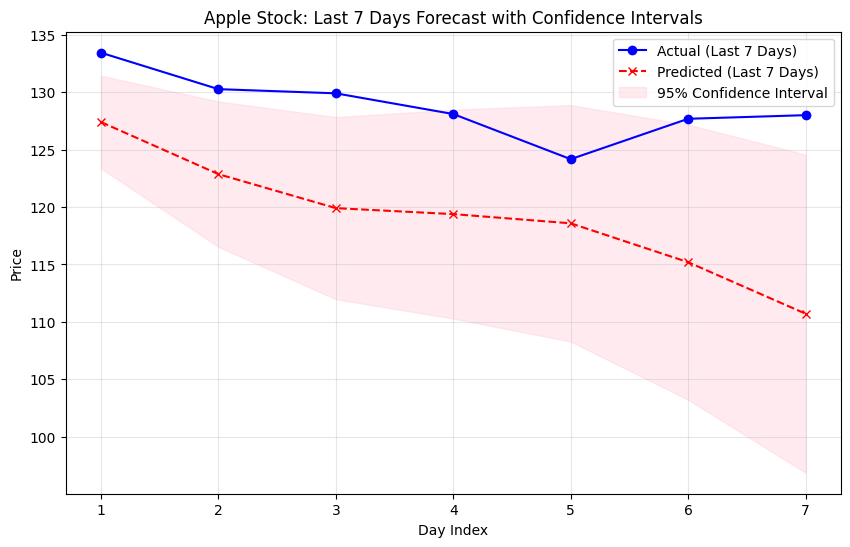

In [12]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 1. Clean data preparation
ts1 = all_ts['AAPL'].dropna()
# Keep test1 as a Series to preserve the index for plotting
size1 = int(len(ts1) * 0.66)
train1, test1 = ts1.iloc[0:size1], ts1.iloc[size1:]

window_size1 = 7
forecast_horizon1 = 7
history1 = [float(x) for x in train1.values[-window_size1:]]
predictions1 = []
lower_bounds = []
upper_bounds = []

# 2. Multi-step Rolling Forecast Loop
for t in range(0, len(test1), forecast_horizon1):
    model = ARIMA(history1, order=(2,2,3))
    model_fit = model.fit()

    # Get forecast object for the 7-day block
    forecast_obj = model_fit.get_forecast(steps=forecast_horizon1)
    yhat_block = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int(alpha=0.05) # 95% CI

    # Store predictions and intervals
    for i in range(len(yhat_block)):
        if (t + i) < len(test1):
            predictions1.append(yhat_block[i])
            lower_bounds.append(conf_int[i, 0])
            upper_bounds.append(conf_int[i, 1])

    # 3. Update history with ACTUAL values
    for i in range(forecast_horizon1):
        if (t + i) < len(test1):
            obs = float(test1.values[t + i])
            history1.append(obs)
            history1.pop(0)
            print(f'Day {t+i+1}: predicted={yhat_block[i]:f}, expected={obs:f}')

# 4. Slice data for the final 7 days
last_7_actual = test1.values[-7:]
last_7_predicted = predictions1[-7:]
last_7_lower = lower_bounds[-7:]
last_7_upper = upper_bounds[-7:]

# 5. Visualization
plt.figure(figsize=(10, 6))
days = range(1, 8)

plt.plot(days, last_7_actual, marker='o', label='Actual (Last 7 Days)', color='blue')
plt.plot(days, last_7_predicted, marker='x', label='Predicted (Last 7 Days)', color='red', linestyle='--')

# Fill the confidence interval
plt.fill_between(days, last_7_lower, last_7_upper, color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Apple Stock: Last 7 Days Forecast with Confidence Intervals')
plt.xlabel('Day Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculating standard metrics
rmse1 = np.sqrt(mean_squared_error(test1[-7:], predictions1[-7:]))
mae1 = mean_absolute_error(test1[-7:], predictions1[-7:])

print("For APPLE Stocks: ")
print(f'Root Mean Squared Error: {rmse1}')
print(f'Mean Absolute Error: {mae1}')

For APPLE Stocks: 
Root Mean Squared Error: 10.374083950982904
Mean Absolute Error: 9.646038769062


In [20]:
# Calculating MAPE
mape1 = np.mean(np.abs((np.array(test1[-7:]) - np.array(predictions1[-7:])) / np.array(test1[-7:]))) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape1:.2f}%')

Mean Absolute Percentage Error (MAPE): 7.50%


Day 1: predicted=62.387237, expected=61.187191
Day 2: predicted=64.121965, expected=61.591137
Day 3: predicted=64.981194, expected=61.443752
Day 4: predicted=64.179125, expected=61.419430
Day 5: predicted=62.747483, expected=62.321117
Day 6: predicted=61.917624, expected=62.593567
Day 7: predicted=62.707781, expected=62.748890
Day 8: predicted=63.761857, expected=62.155869
Day 9: predicted=64.155170, expected=61.963821
Day 10: predicted=64.315717, expected=62.435257
Day 11: predicted=65.353932, expected=61.148972
Day 12: predicted=65.843787, expected=60.744034
Day 13: predicted=66.000972, expected=60.336613
Day 14: predicted=67.045709, expected=60.639324
Day 15: predicted=59.419442, expected=60.414021
Day 16: predicted=59.134917, expected=60.629398
Day 17: predicted=58.739031, expected=60.600117
Day 18: predicted=59.030967, expected=61.373775
Day 19: predicted=57.849211, expected=62.342457
Day 20: predicted=57.572794, expected=61.825863
Day 21: predicted=57.143034, expected=62.758312
D

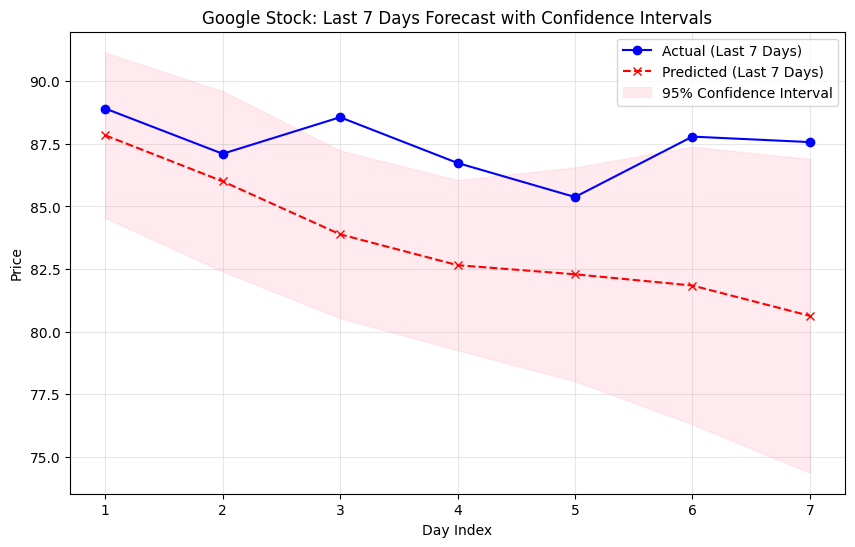

In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 1. Clean data preparation
ts2 = all_ts['GOOGL'].dropna()
# Keep test1 as a Series to preserve the index for plotting
size2 = int(len(ts2) * 0.66)
train2, test2 = ts2.iloc[0:size2], ts2.iloc[size2:]

window_size2 = 7
forecast_horizon2 = 7
history2 = [float(x) for x in train2.values[-window_size2:]]
predictions2 = []
lower_bounds2 = []
upper_bounds2 = []

# 2. Multi-step Rolling Forecast Loop
for t in range(0, len(test2), forecast_horizon2):
    model = ARIMA(history2, order=(3,2,3))
    model_fit = model.fit()

    # Get forecast object for the 7-day block
    forecast_obj = model_fit.get_forecast(steps=forecast_horizon1)
    yhat_block = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int(alpha=0.05) # 95% CI

    # Store predictions and intervals
    for i in range(len(yhat_block)):
        if (t + i) < len(test2):
            predictions2.append(yhat_block[i])
            lower_bounds2.append(conf_int[i, 0])
            upper_bounds2.append(conf_int[i, 1])

    # 3. Update history with ACTUAL values
    for i in range(forecast_horizon2):
        if (t + i) < len(test2):
            obs = float(test2.values[t + i])
            history2.append(obs)
            history2.pop(0)
            print(f'Day {t+i+1}: predicted={yhat_block[i]:f}, expected={obs:f}')

# 4. Slice data for the final 7 days
last_7_actual2 = test2.values[-7:]
last_7_predicted2 = predictions2[-7:]
last_7_lower2 = lower_bounds2[-7:]
last_7_upper2 = upper_bounds2[-7:]

# 5. Visualization
plt.figure(figsize=(10, 6))
days = range(1, 8)

plt.plot(days, last_7_actual2, marker='o', label='Actual (Last 7 Days)', color='blue')
plt.plot(days, last_7_predicted2, marker='x', label='Predicted (Last 7 Days)', color='red', linestyle='--')

# Fill the confidence interval
plt.fill_between(days, last_7_lower2, last_7_upper2, color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Google Stock: Last 7 Days Forecast with Confidence Intervals')
plt.xlabel('Day Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculating standard metrics
rmse2 = np.sqrt(mean_squared_error(test2[-7:], predictions2[-7:]))
mae2 = mean_absolute_error(test2[-7:], predictions2[-7:])

print("For GOOGLE Stocks:")
print(f'Root Mean Squared Error: {rmse2}')
print(f'Mean Absolute Error: {mae2}')

For GOOGLE Stocks:
Root Mean Squared Error: 4.372649233325226
Mean Absolute Error: 3.841618472538672


In [21]:
# Calculating MAPE
mape2 = np.mean(np.abs((np.array(test2[-7:]) - np.array(predictions2[-7:])) / np.array(test2[-7:]))) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape2:.2f}%')

Mean Absolute Percentage Error (MAPE): 4.39%


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 1. Clean data preparation
ts3 = all_ts['MSFT'].dropna()
# Keep test1 as a Series to preserve the index for plotting
size3 = int(len(ts3) * 0.66)
train3, test3 = ts3.iloc[0:size3], ts3.iloc[size3:]

window_size3 = 7
forecast_horizon3 = 7
history3 = [float(x) for x in train3.values[-window_size3:]]
predictions3 = []
lower_bounds3 = []
upper_bounds3 = []

# 2. Multi-step Rolling Forecast Loop
for t in range(0, len(test3), forecast_horizon3):
    model = ARIMA(history3, order=(3,1,3))
    model_fit = model.fit()

    # Get forecast object for the 7-day block
    forecast_obj = model_fit.get_forecast(steps=forecast_horizon3)
    yhat_block = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int(alpha=0.05) # 95% CI

    # Store predictions and intervals
    for i in range(len(yhat_block)):
        if (t + i) < len(test2):
            predictions3.append(yhat_block[i])
            lower_bounds3.append(conf_int[i, 0])
            upper_bounds3.append(conf_int[i, 1])

    # 3. Update history with ACTUAL values
    for i in range(forecast_horizon3):
        if (t + i) < len(test3):
            obs = float(test3.values[t + i])
            history3.append(obs)
            history3.pop(0)
            print(f'Day {t+i+1}: predicted={yhat_block[i]:f}, expected={obs:f}')

# 4. Slice data for the final 7 days
last_7_actual3 = test3.values[-7:]
last_7_predicted3 = predictions3[-7:]
last_7_lower3 = lower_bounds3[-7:]
last_7_upper3 = upper_bounds3[-7:]

# 5. Visualization
plt.figure(figsize=(10, 6))
days = range(1, 8)

plt.plot(days, last_7_actual3, marker='o', label='Actual (Last 7 Days)', color='blue')
plt.plot(days, last_7_predicted3, marker='x', label='Predicted (Last 7 Days)', color='red', linestyle='--')

# Fill the confidence interval
plt.fill_between(days, last_7_lower3, last_7_upper3, color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Google Stock: Last 7 Days Forecast with Confidence Intervals')
plt.xlabel('Day Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculating standard metrics
rmse3 = np.sqrt(mean_squared_error(test3[-7:], predictions3[-7:]))
mae3 = mean_absolute_error(test3[-7:], predictions3[-7:])

print("For MICROSOFT stocks:")
print(f'Root Mean Squared Error: {rmse3}')
print(f'Mean Absolute Error: {mae3}')

For MICROSOFT stocks:
Root Mean Squared Error: 54.42861250008185
Mean Absolute Error: 54.31261257153797


In [22]:
# Calculating MAPE
mape3 = np.mean(np.abs((np.array(test3[-7:]) - np.array(predictions3[-7:])) / np.array(test3[-7:]))) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape3:.2f}%')

Mean Absolute Percentage Error (MAPE): 23.28%


[*********************100%***********************]  3 of 3 completed



--- Analyzing Ticker: AAPL ---


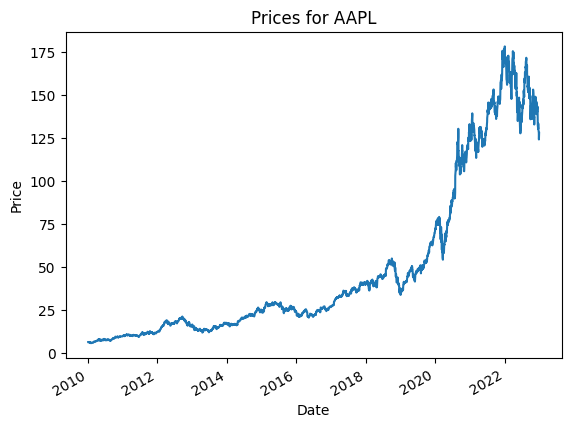


--- Analyzing Ticker: MSFT ---


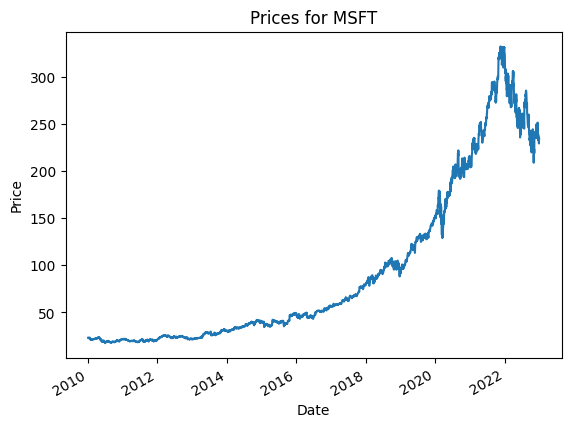


--- Analyzing Ticker: GOOGL ---


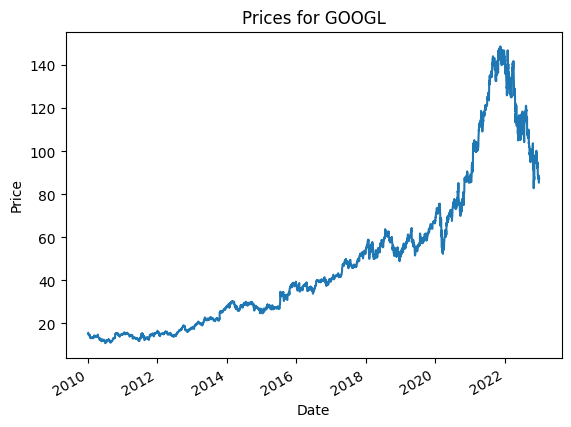

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the tickers
tickers = ['AAPL', 'MSFT', 'GOOGL']

# Download historical data
data = yf.download(tickers, start='2010-01-01', end='2023-01-01', interval='1d')

# Select the 'Close' prices
all_ts = data['Close']

# Loop through each ticker to plot the historical trend graph
for ticker in tickers:
    print(f"\n--- Analyzing Ticker: {ticker} ---")

    # Prepare the time series for this specific ticker and remove missing values
    ts = all_ts[ticker].dropna()

    # Plot the Original Series
    ts.plot(title=f"Prices for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()